# Исследование маркетинговых расходов Яндекс Афиши

###### Исследование расходов на маргкетинг разделим на несколько частей.

##### Шаг 1. Изучение общей информации и первичная подготовка данных:
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#step1)

##### Шаг 2. Построение отчетов и расчет метрик:
* [1. Продукт.](#step2_1)
* [2. Продажи.](#step2_2)
* [3. Маркетинг.](#step2_3)

##### Шаг 3. Общий вывод
* [1. Формирование общих выводов и рекомендаций по результатам исследования.](#step3)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Хороший старт!
</div>

### Шаг 1. Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

Загрузим данные для анализа

In [2]:
visits=pd.read_csv('visits_log.csv')

In [3]:
orders=pd.read_csv('orders_log.csv')

In [4]:
costs=pd.read_csv('costs.csv')

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [6]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Изменим названия столбцов и приведем данные в столбцах End TS и Start TS к типу даты

In [7]:
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [8]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [9]:
visits['end_ts']=pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')

In [10]:
visits['start_ts']=pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')

Познакомимся с данными о заказах

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [12]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Изменим названия столбцов и приведем данные в столбцах buy TS к типу даты

In [13]:
orders.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [14]:
orders.columns=['buy_ts', 'revenue', 'uid']

In [15]:
orders['buy_ts']=pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')

Познакомимся с данными о маркетинговых расходах

In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [17]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [18]:
costs['dt']=pd.to_datetime(costs['dt'], format='%Y-%m-%d')

Узнаем какой временной промежуток затрагивают наши данные о заказах и затратах

In [19]:
orders['buy_ts'].describe()

<ipython-input-19-33a8dd77b0b6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders['buy_ts'].describe()


count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [20]:
costs['dt'].describe()

<ipython-input-20-7bd2c2bc0743>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  costs['dt'].describe()


count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

Ограничим данные о затратах 31.05.2018

In [21]:
orders = orders[orders['buy_ts']<'2018-05-31 23:59:59']

Рассчитаем итоги по столбцам revenue и costs

In [22]:
total_revenue=orders['revenue'].sum()
total_revenue

252053.77999999997

In [23]:
total_costs = costs['costs'].sum()
total_costs

329131.62

In [24]:
print('Общая выручка {:.2f}'.format(total_revenue))
print('Общие затраты на маркетинг {:.2f}'.format(total_costs))

Общая выручка 252053.78
Общие затраты на маркетинг 329131.62


### Вывод Шаг 1

***Информация о времени начала и конца сессии, источнике траффика, пользовательском устройстве содержится в таблице visits. Данные о ежедневных расходах на маркетинг в разрезе источников траффика можно увидеть в таблице costs. Выручка по каждому заказу содержиться в таблице orders. Таблицы orders и visits можно связать по полю id пользователя - uid. Данные доступны от 01.06.2017 по 31.05.2018. Временные данные приведены к типу datetime.***

***Изучим пользовательские метрики, метрики продаж и маркетинга в следующем шаге.***

### Шаг 2. Построение отчетов и расчет метрик:
<a id='step2_1'></a>

#### Продукт


Узнаем, сколько людей пользуются в день, неделю, месяц? Для этого рассчитаем  метрики среднедневного, средненедельного и среднемесячного количества уникальных пользователей

In [25]:
visits['session_year']=visits['start_ts'].dt.year
visits['session_month']=visits['start_ts'].dt.month
visits['session_week']=visits['start_ts'].dt.week
visits['session_date']=visits['start_ts'].dt.date

<ipython-input-25-2aabb22f0b31>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits['session_week']=visits['start_ts'].dt.week


In [26]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
int(dau_total)

907

In [27]:
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
int(wau_total)

5716

In [28]:
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
int(mau_total)

23228

***В среднем 907 уникальных пользователей заходят на сайт Яндекс Афиши за день, 5716 - в месяц и 23 228 - в год.***

Рассмотрим графики средненедельного и среднемесячного количества уникальных пользователей в разрезе источников траффика

In [29]:
visits_by_source=visits.pivot_table(
        index=['session_year', 'session_month'], 
        columns='source_id', 
        values='uid', 
        aggfunc='nunique')

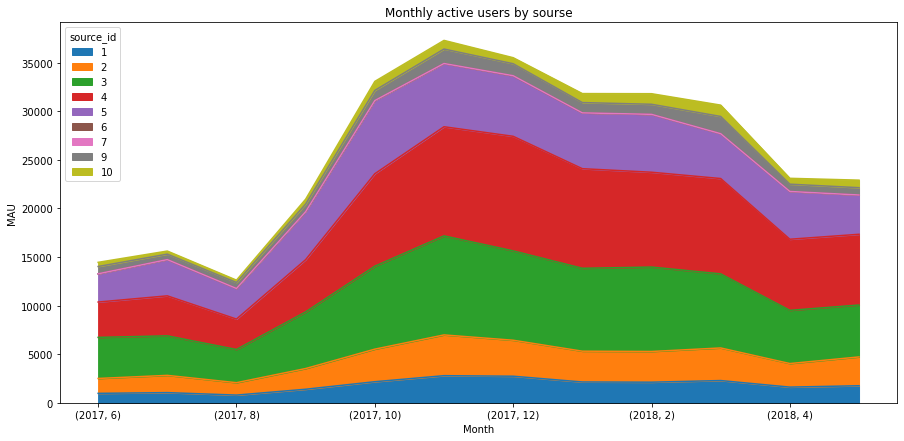

In [30]:
ax=visits_by_source.plot.area(figsize = (15, 7))
plt.title("Monthly active users by sourse")
plt.xlabel("Month")
plt.ylabel("MAU")
plt.show()

In [31]:
visits_by_source_weekly=visits.pivot_table(
        index=['session_year', 'session_week'], 
        columns='source_id', 
        values='uid', 
        aggfunc='nunique')

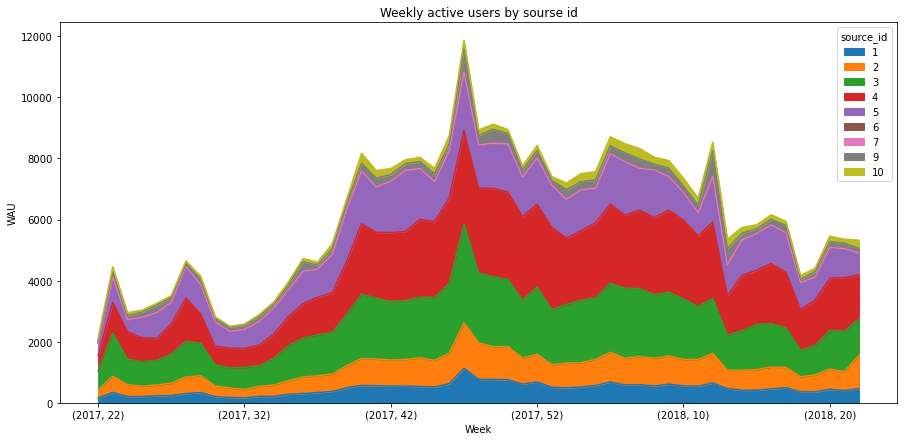

In [32]:
visits_by_source_weekly.plot.area(figsize = (15,7))
plt.title("Weekly active users by sourse id")
plt.xlabel("Week")
plt.ylabel("WAU")
plt.show()

***Наибольшее количество пользователей пришло на сайт из 4, 3 и 5 источников. 6, 7 и 8 источники - пробные, данные есть не за весь период, количество пользователей по ним минимально. Количество уникальных пользователей увеличилось в октябре 2017,  а в апреле 2018 начало снижаться. Возможно это связано со снижением расходов на маркетинг.***

 Рассмотрим гистограмму среднемесячных пользователей в разбивке по используемым устройствам

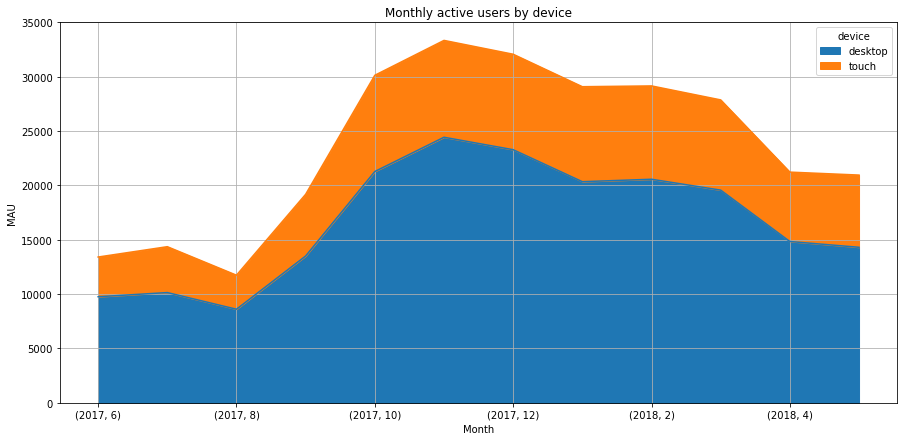

In [33]:
(visits
     .pivot_table(index=['session_year', 'session_month'], 
        columns='device', 
        values='uid', 
        aggfunc={'uid': 'nunique'})
     .plot.area(grid=True, figsize=(15, 7), legend=True)
)
plt.title("Monthly active users by device")
plt.xlabel("Month")
plt.ylabel("MAU")
plt.show()

***Пользователи в среднем в 2 раза чаше просматривают сайт Яндекс Афиши на ПК, чем на мобильном устройстве***

Рассчитаем сколько сессий проведено в день, сколько сессий приходиться на 1 пользователя.

In [34]:
sessions_per_user_daily = visits.groupby(['session_date']).agg({'uid': ['count','nunique']})

In [35]:
sessions_per_user_daily.columns=['n_sessions', 'n_users']

In [36]:
sessions_per_user_daily['sessions_per_user']=sessions_per_user_daily['n_sessions'] / sessions_per_user_daily['n_users']

In [37]:
sessions_per_user_daily.mean()

n_sessions           987.362637
n_users              907.991758
sessions_per_user      1.082170
dtype: float64

В среднем на 1 пользователя приходиться 1,08 сессий в день. Большинство пользователей зашедших на сайт, используют сервис для решения своей задачи за 1 сессию.

In [38]:
sessions_per_user_weekly = visits.groupby(['session_year', 'session_week']).agg({'uid': ['count','nunique']})

In [39]:
sessions_per_user_weekly.columns = ['n_sessions', 'n_users']

In [40]:
sessions_per_user_weekly['sessions_per_user']=sessions_per_user_weekly['n_sessions'] / sessions_per_user_weekly['n_users']

In [41]:
sessions_per_user_weekly.mean()

n_sessions           6781.132075
n_users              5716.245283
sessions_per_user       1.179025
dtype: float64

В среднем на 1 пользователя приходиться 1,17 сессий в неделю. Только 17 % пользователей, вошедших на сайт, вернуться на него в течении недели. Месячный показатель рассмотрим в разрезе устройств.

In [42]:
sessions_per_user_monthly = visits.pivot_table(index=['session_year', 'session_month'], 
        columns='device', 
        values='uid', 
        aggfunc=['count','nunique'])

In [43]:
sessions_per_user_monthly.columns = ['n_sessions_desktop', 'n_sessions_touch', 'n_users_desktop', 'n_users_touch']

In [44]:
sessions_per_user_monthly['sessions_per_user_desktop']=sessions_per_user_monthly['n_sessions_desktop'] / sessions_per_user_monthly['n_users_desktop']

In [45]:
sessions_per_user_monthly['sessions_per_user_touch']=sessions_per_user_monthly['n_sessions_touch'] / sessions_per_user_monthly['n_users_touch']

In [46]:
sessions_per_user_monthly.mean()

n_sessions_desktop           21880.583333
n_sessions_touch              8069.416667
n_users_desktop              16724.916667
n_users_touch                 6825.916667
sessions_per_user_desktop        1.301275
sessions_per_user_touch          1.173042
dtype: float64

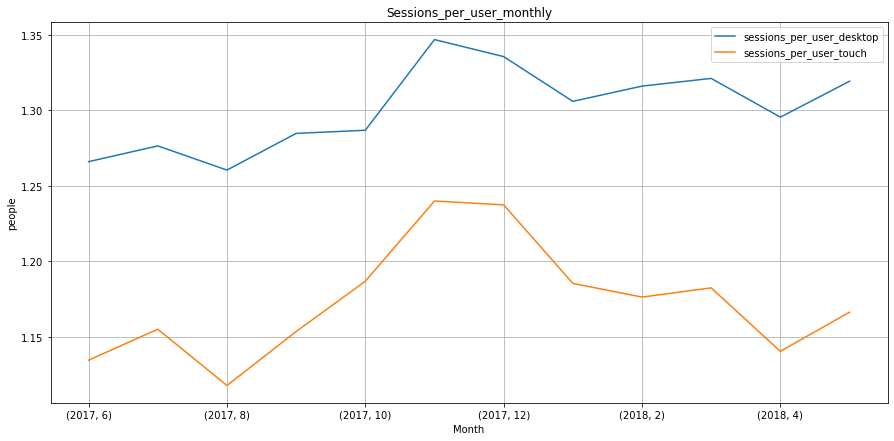

In [47]:
ax1=sessions_per_user_monthly['sessions_per_user_desktop'].plot(grid=True, figsize=(15, 7), legend=True)
ax1=sessions_per_user_monthly['sessions_per_user_touch'].plot(ax=ax1, grid=True, figsize=(15, 7), legend=True)
plt.title("Sessions_per_user_monthly")
plt.xlabel("Month")
plt.ylabel("people")
plt.show()

***Пользователи, использующие для входа на сайт ПК, возврашаются на сайт чаще, чем пользователи мобильных устройств. Возможно мобильная версия менее удобна.***

Рассчитаем, сколько длится одна сессия?

In [48]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

Text(0, 0.5, 'frequency')

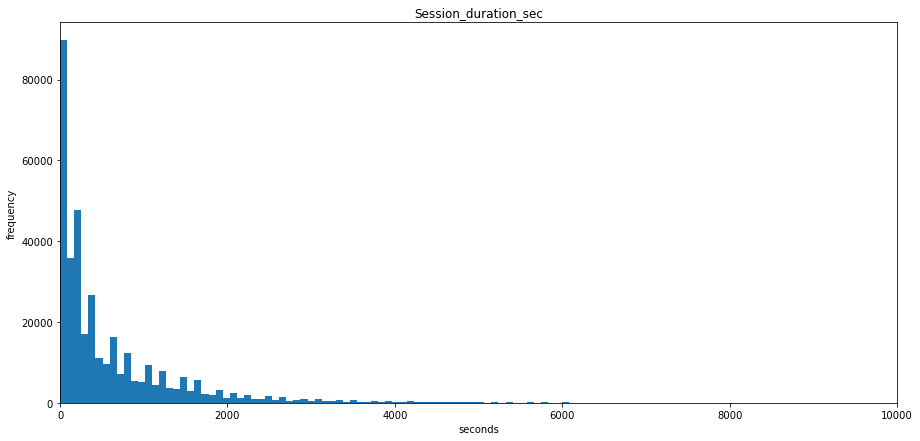

In [49]:
visits['session_duration_sec'].plot(kind='hist', bins=1000, figsize=(15, 7), xlim=(0, 10000))
plt.title("Session_duration_sec")
plt.xlabel("seconds")
plt.ylabel("frequency") 

Более 80000 сессий длиться 0 сек. Распределение также имеет длинный правый "хвост". Лучше всего в данном случае среднюю длительность охарактеризует медиана.

In [50]:
visits['session_duration_sec'].median()

300.0

Проверим длительность сессий на ПК и на мобильных устройствах

In [51]:
desktop_duration=visits[visits['device']== 'desktop']['session_duration_sec'].median()
desktop_duration

360.0

In [52]:
touch_duration=visits[visits['device']== 'touch']['session_duration_sec'].median()
touch_duration

180.0

***В среднем сессия длиться 60 сек. Длительность сессий на ПК в 2 раза длиннее, чем на мобильных устройствах.***

Для того, чтобы понять как часто люди возвращаются рассчитаем Retention rate, Churn rate

Необходимо выделить месячные когорты. Сначала выделим в отдельную таблицу дату первого посещения сервиса пользователем.

In [53]:
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on='uid') 

Найдем месяц первого посещения и месяц текущей сессии

In [54]:
visits['first_visit_month']=visits['first_activity_date'].astype('datetime64[M]')
visits['visit_month']=visits['start_ts'].astype('datetime64[M]')

Выделим жизненный цикл когорты

In [55]:
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)

In [56]:
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

Определим начальное число пользователей в когорте

In [57]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
initial_users_count

,first_visit_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [58]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

Сведем данные в 1 таблицу, сгруппируем и построем тепловую карту

In [59]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')

In [60]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 

In [61]:
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

In [62]:
labels=retention_pivot.index.date

In [63]:
label=list(labels) + ['mean']

In [64]:
retention_mean=retention_pivot.mean()
retention_mean.name='mean'

In [65]:
retention_pivot=retention_pivot.append(retention_mean)

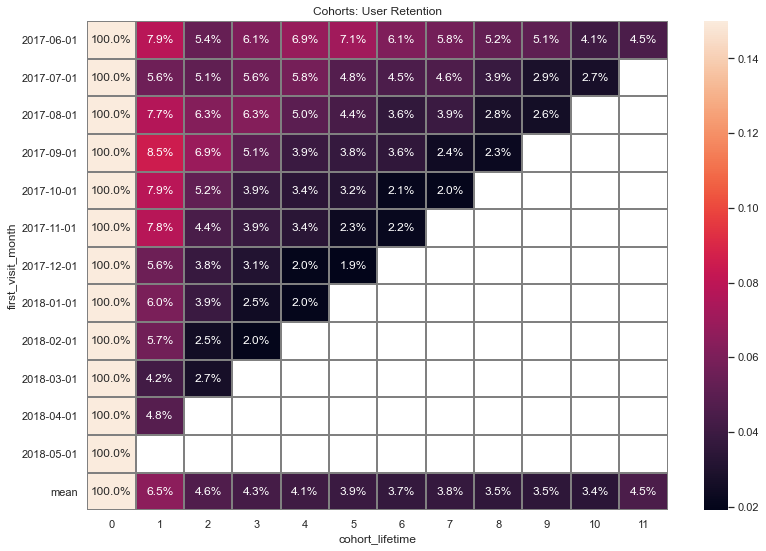

In [66]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.15,  yticklabels=label); 

***В общем можно сделать вывод, что пользователи используют сервис нерегулярно. В первой кагорте (июнь 2017) на второй месяц после первого посещения вернулись только 7,9% пользователей. Далее не происходит такого резкого снижения: к концу 11 месяца  4,5% пользователей из первой кагорты вновь пользовались сервисом. Моментом требующим внимания, можно отметить тенденцию к снижению Retention rate 1 месяца в последних кагортах( февраль-апрель 2018).***

In [67]:
cohorts['churn_rate'] = cohorts.groupby(['first_visit_month'])['uid'].pct_change() 

In [68]:
churn_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='churn_rate',aggfunc='sum')

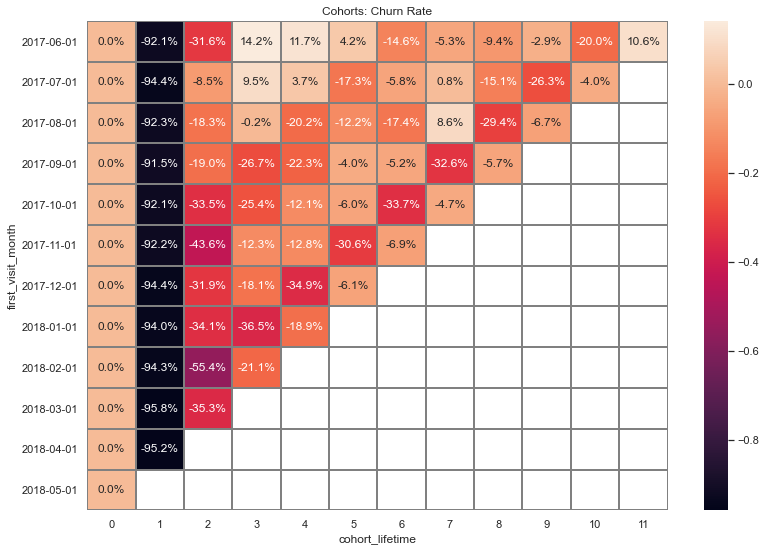

In [69]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Churn Rate')
sns.heatmap(churn_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', yticklabels=labels)
plt.show()

***Опасную тенденцию к снижению Retention пользователей в последних кагортах подтверждает и расчет Churn rate. Первые 3 кагорты иногда даже показывают плюс, значит пользователи возвращаются после того, как несколько месяцев не использовали сервис. Апрель 2018 - плохой месяц для всех кагорт (снижение от20 до 55 %).***

#### Продажи
<a id='step2_2'></a>

Проверим сколько времени проходит от первого визита на сайт до первой покупки?

Найдем дату первой покупки для всех пользователей. Дата первого визита содержиться в таблице first_activity_date.

In [70]:
first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min()

In [71]:
first_order_date_by_customers.name = 'first_order_date'
orders = orders.join(first_order_date_by_customers,on='uid')

In [72]:
orders = orders.join(first_activity_date, on='uid')

In [73]:
orders['time_to_order']=(orders['first_order_date']-orders['first_activity_date']).dt.seconds / 60 

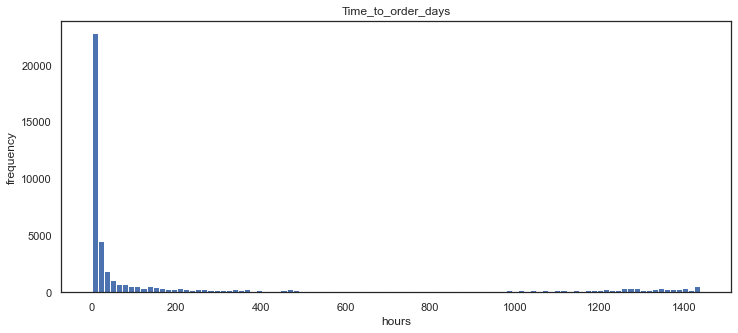

In [74]:
orders['time_to_order'].plot(kind='hist', bins=100, figsize=(12, 5))
plt.title("Time_to_order_days")
plt.xlabel("hours")
plt.ylabel("frequency");

In [75]:
orders['time_to_order'].describe()

count    50414.000000
mean       284.661780
std        455.798881
min          0.000000
25%          4.000000
50%         20.000000
75%        363.000000
max       1439.000000
Name: time_to_order, dtype: float64

In [76]:
orders['time_to_order'].median()

20.0

***В среднем пользователи покупают через 20 часов после первого визита на сайт.***

In [77]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [78]:
time_to_order_pivot=orders.pivot_table(index='first_order_month',
    values='time_to_order',
    aggfunc='median')

Расчитаем этот показатель по кагортам

In [79]:
time_to_order_pivot

,time_to_order
first_order_month,
2017-06-01,12.0
2017-07-01,15.0
2017-08-01,10.0
2017-09-01,17.0
2017-10-01,16.0
2017-11-01,40.0
2017-12-01,30.0
2018-01-01,31.0
2018-02-01,26.0


***Время между первым визитом на сайт и первой покупкой в кагортах июня-октября 2017 было ниже среднего. В ноябре 2011-феврале2018 пользователям требовалось больше времени на покупку (в среднем до 40 часов). Как раз в это время увеличился траффик (возможно были технические проблемы у сайта). Далее с марта 2018 наметилась тенденция к снижению времени до первой покупки.***

Рассчитаем количество повторных покупок. 

In [80]:
first_order_pivot = orders.pivot_table(index='first_order_month',
    columns='order_month',
    values='uid',
    aggfunc='nunique')

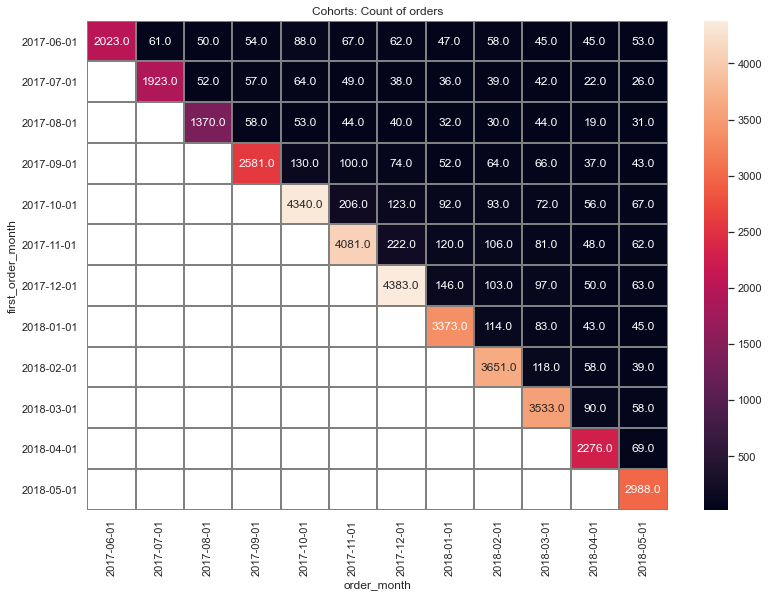

In [81]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Count of orders')
sns.heatmap(first_order_pivot, annot=True, fmt='1', linewidths=1, linecolor='gray', yticklabels=labels, xticklabels=labels);

***Количество посетителей, которые делают повторный заказ относительно первоначального размера когорты менее 5%. Однако эта цифра остается постоянной. Отследим покупателей июньской кагорты. Всего их было 2023 человека, в июле 61 человек совершил повторную покупку, а в мае 2018 - 53 человека.***

Рассчитаем средний чек?

In [82]:
revenue_per_user=orders['revenue'].sum() / orders['uid'].nunique()

In [83]:
revenue_per_user

6.901423251738677

Рассмотрим средний чек по кагортам.

In [84]:
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'}).reset_index()

In [85]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype(int)

In [86]:
orders_grouped_by_cohorts['revenue'].sum()

252053.77999999933

In [87]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid'] 

In [88]:
revenue_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean') 

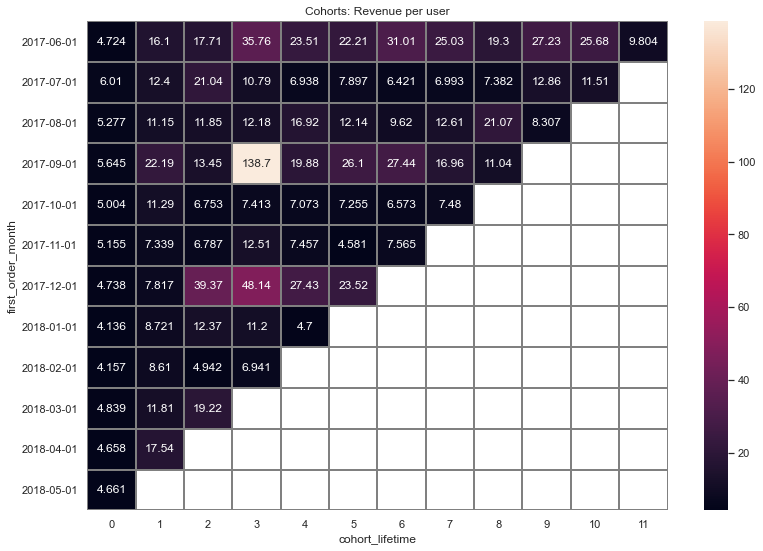

In [89]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Revenue per user')
sns.heatmap(revenue_pivot, annot=True, fmt='0.4', linewidths=1, linecolor='gray', yticklabels=labels);

***Средний чек за исследуемый период составляет 6,9 у.е.***  
***Из карты видно, что средний чек 1, 4 и 7 кагорты выше, чем в остальных. Заметим, что повторные покупки в большинстве дороже, чем в первый месяц.***

Рассчитаем показатель «пожизненной» ценности клиента - LTV по кагортам в разрезе источников трафика 

Определим источник траффика по первому посещению пользователя и присоединим эти данные к таблице orders

In [90]:
visits=visits.sort_values(by='start_ts')

In [91]:
first_source= visits.groupby('uid').agg({'source_id': 'first'})

In [92]:
orders=orders.join(first_source, on='uid')

Рассчитаем первоначальное число покупателей в кагортах

In [93]:
cohort_sizes = orders.groupby(['first_order_month', 'source_id']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'source_id', 'n_buyers']
cohort_sizes.head()

,first_order_month,source_id,n_buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


Соединим и сгруппируем данные таблиц orders и cohort_sizes

In [94]:
orders_cohorts = orders.groupby(['first_order_month', 'source_id', 'order_month']).agg({'revenue': 'sum'}).reset_index()
orders_cohorts.head()

,first_order_month,source_id,order_month,revenue
0,2017-06-01,1,2017-06-01,1378.70
1,2017-06-01,1,2017-07-01,414.98
2,2017-06-01,1,2017-08-01,419.43
3,2017-06-01,1,2017-09-01,714.24
4,2017-06-01,1,2017-10-01,811.20


In [95]:
report = pd.merge(cohort_sizes, orders_cohorts, on=['first_order_month', 'source_id'])

Расчитаем возраст кагорт и LTV

In [96]:
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [97]:
report['ltv'] = report['revenue'] / report['n_buyers']

In [98]:
report['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10,  7], dtype=int64)

In [99]:
report['revenue'].sum()

252053.78000000003

In [100]:
report=report[report['source_id'] != 7]

In [101]:
ltv_pivot=report.pivot_table(index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)

In [102]:
ltv_mean=ltv_pivot.mean()
ltv_mean.name='mean'
ltv_pivot=ltv_pivot.append(ltv_mean)

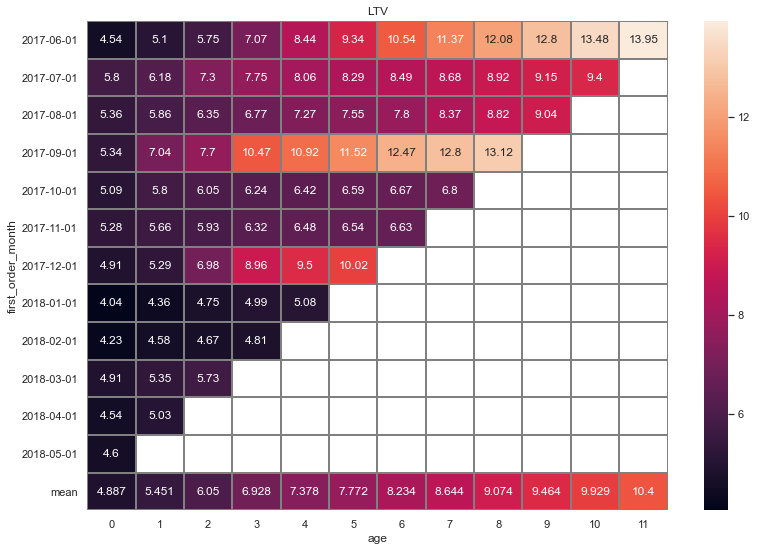

In [103]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(ltv_pivot.cumsum(axis=1), annot=True, fmt='0.4', linewidths=1, linecolor='gray', yticklabels=label);


***В среднем к 11 месяцу LTV составила 10,4 у.е. Рассмотрим LTV по источникам траффика***

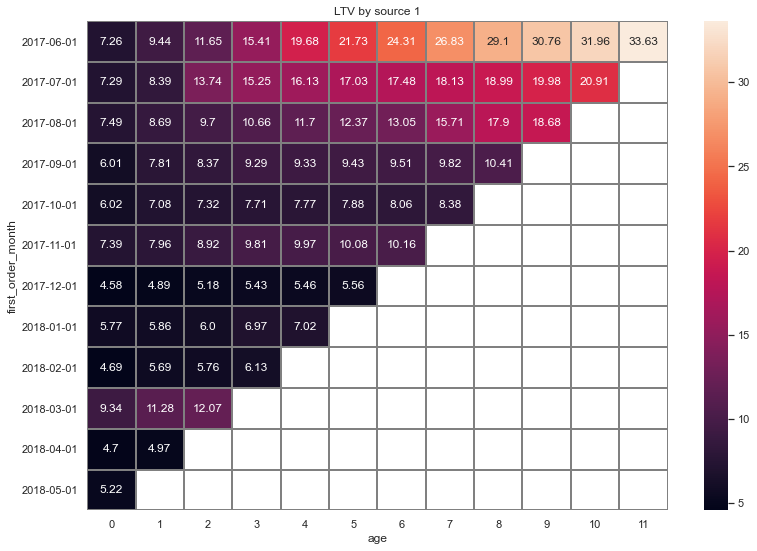

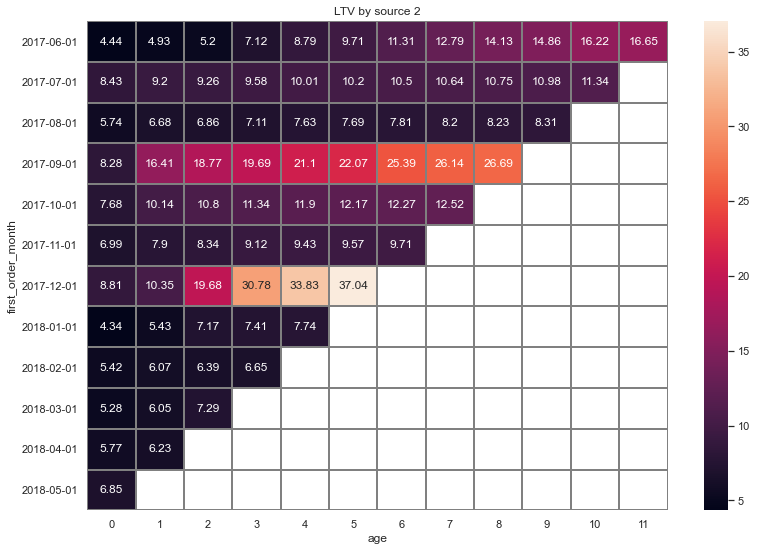

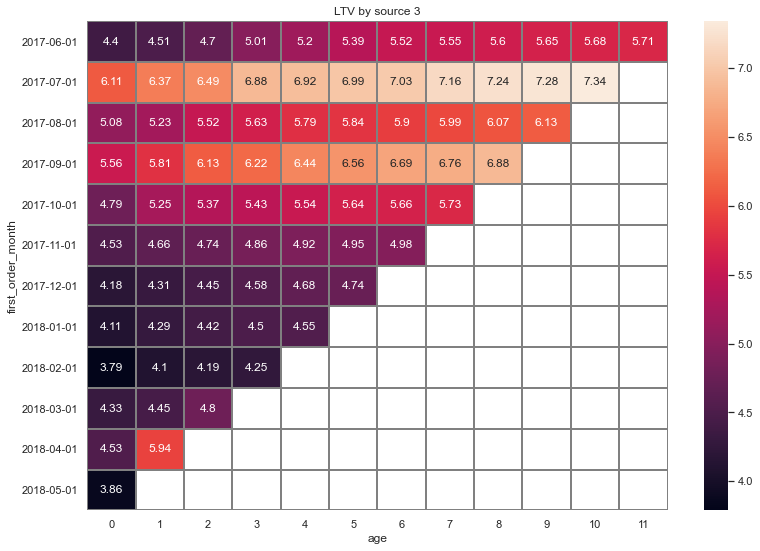

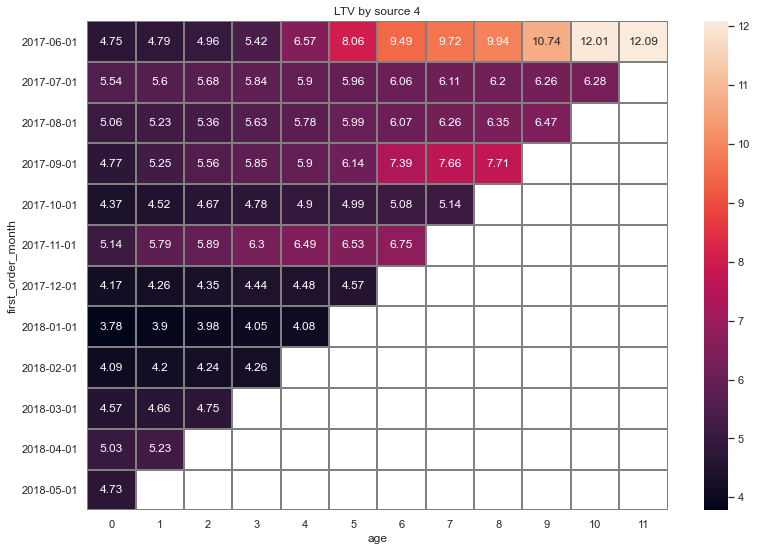

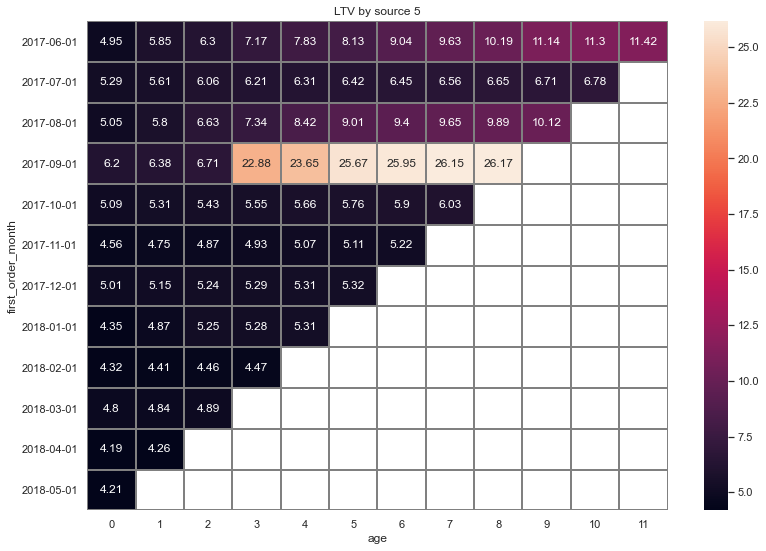

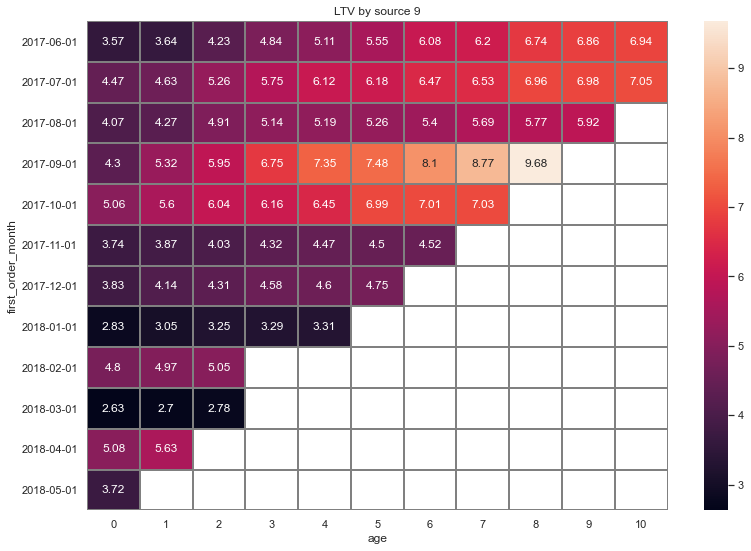

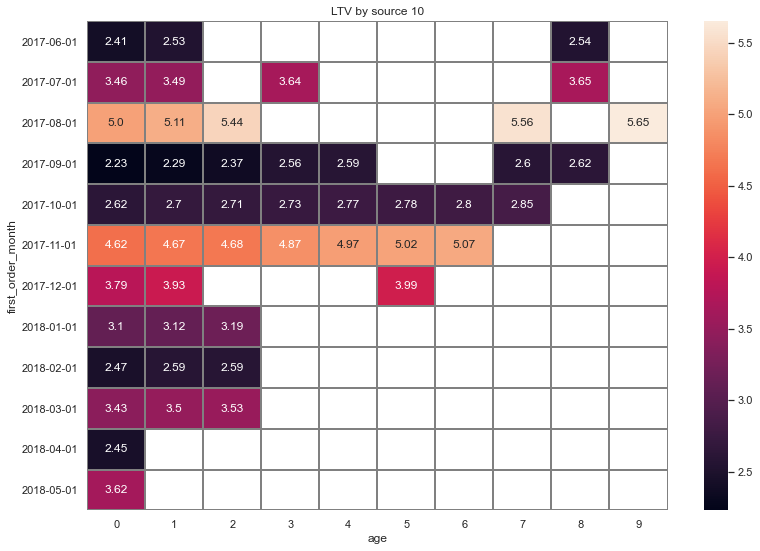

In [104]:
for source_id in report['source_id'].unique():
    output=report.query('source_id == @source_id').pivot_table(index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('LTV by source {:}'.format(source_id))
    sns.heatmap(output.cumsum(axis=1), annot=True, fmt='0.4', linewidths=1, linecolor='gray', yticklabels=labels);


In [105]:
ltv_by_source = report.pivot_table(
        index='first_order_month',
        columns='source_id',
        values='ltv', 
        aggfunc='mean')
ltv_by_source

source_id,1,2,3,4,5,9,10
first_order_month,,,,,,,
2017-06-01,2.803680,1.388390,0.475486,1.007399,0.950009,0.631217,0.846526
2017-07-01,1.899159,1.030406,0.667798,0.570884,0.616349,0.640175,0.912353
2017-08-01,1.868062,0.831455,0.613647,0.647547,1.012247,0.592525,1.130865
2017-09-01,1.157391,2.966973,0.765301,0.856412,2.908085,1.074355,0.376462
2017-10-01,1.047824,1.563444,0.715023,0.642597,0.754643,0.878135,0.356148
2017-11-01,1.453161,1.388550,0.712850,0.965158,0.743762,0.646621,0.726217
2017-12-01,0.925332,6.173005,0.789799,0.760671,0.885748,0.791584,1.328353
2018-01-01,1.405303,1.548870,0.912260,0.817645,1.062780,0.662800,1.061341
2018-02-01,1.530818,1.660811,1.061742,1.064308,1.117529,1.683254,0.864553


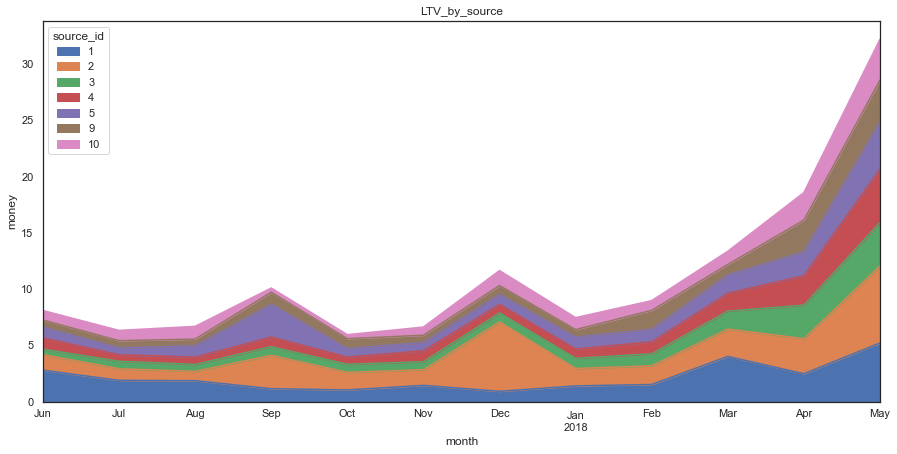

In [106]:
ltv_by_source.plot.area(figsize = (15,7))
plt.title("LTV_by_source")
plt.xlabel("month")
plt.ylabel("money");

***1 и 2 источники - дают максимальную выручку в абсолютном выражении. В мае 2018 года выручка по всем каналам растет. Хороший знак, но чтобы сделать вывод об эффективности каналов необходимо рассчитать показатели CAC и ROMI***

#### Маркетинг
<a id='step2_3'></a>

Узнаем сколько денег потратили? Всего / на каждый источник / по времени


In [107]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [108]:
costs_by_source=costs.pivot_table(
        index=['month'], 
        columns='source_id', 
        values='costs', 
        aggfunc='sum')
costs_by_source

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


In [109]:
costs_by_source.sum().sum()

329131.62

Text(0, 0.5, 'money')

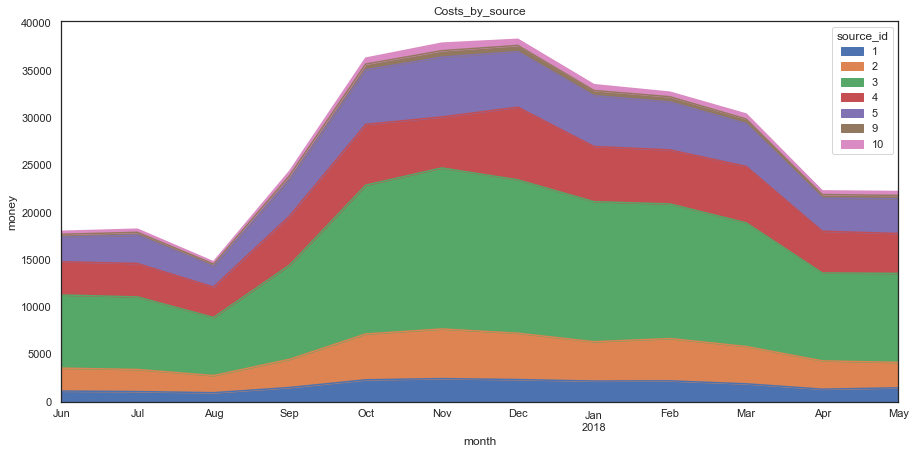

In [110]:
costs_by_source.plot.area(figsize = (15,7))
plt.title("Сosts_by_source")
plt.xlabel("month")
plt.ylabel("money") 

***Наибольшие расходы мы несем по 3 источнику траффика. С октября по март расходы на маркетинг были на максимальном уровне, после чего последовало сокращение расходов.***

Посчитаем сколько стоило привлечение одного покупателя из каждого источника?

In [111]:
monthly_costs = costs.groupby(['month', 'source_id'])['costs'].sum()

In [112]:
report_new = pd.merge(report, monthly_costs, left_on=['first_order_month', 'source_id'], right_on=['month', 'source_id'])

In [113]:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

In [114]:
cac_by_source = report_new.pivot_table(
        index='first_order_month',
        columns='source_id',
        values='cac', 
        aggfunc='mean')
cac_by_source

source_id,1,2,3,4,5,9,10
first_order_month,,,,,,,
2017-06-01,5.924263,10.329277,12.118574,8.510412,6.812813,4.194412,3.307579
2017-07-01,6.705500,11.216875,14.989004,6.827331,7.087801,5.818077,6.467059
2017-08-01,8.423097,14.723984,18.230089,9.518817,6.070222,4.080820,6.285676
2017-09-01,6.616784,13.509774,12.757426,8.800441,6.535042,4.777241,5.356628
2017-10-01,6.811029,12.234848,13.660799,5.478532,6.103069,4.836587,3.001148
2017-11-01,7.546790,13.185126,14.001102,4.578437,9.127475,4.711586,6.190313
2017-12-01,7.073112,12.855118,12.315505,5.577683,7.616757,5.437851,7.598353
2018-01-01,9.185630,14.238836,14.720457,5.651928,8.485814,6.839500,6.677717
2018-02-01,8.016291,15.270785,13.029817,5.164521,7.479808,6.565476,3.909593


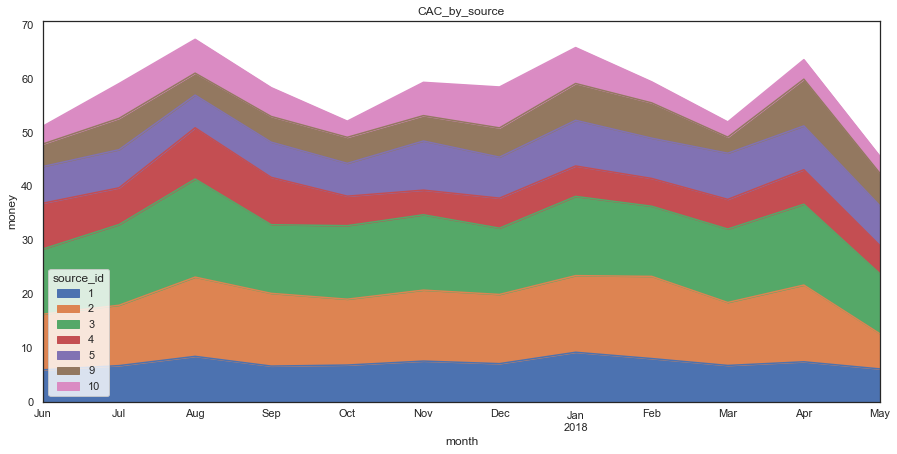

In [115]:
cac_by_source.plot.area(figsize = (15,7))
plt.title("СAC_by_source")
plt.xlabel("month")
plt.ylabel("money");

***В среднем самые дорогие источники траффика - 2 и 3.***

На сколько окупились расходы? (ROI)

In [116]:
report_new['romi'] = report_new['ltv'] / report_new['cac'] * 100

In [117]:
output_romi=report_new.pivot_table(index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

In [118]:
romi_mean=output_romi.mean()
romi_mean.name='mean'
output_romi=output_romi.append(romi_mean)

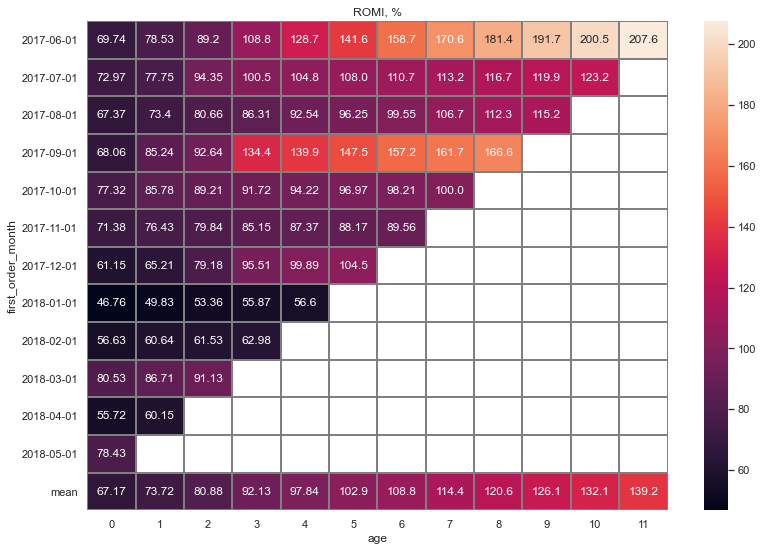

In [119]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI, %')
sns.heatmap(output_romi.cumsum(axis=1), annot=True, fmt='0.4', linewidths=1, linecolor='gray', yticklabels=label);


***Средняя окупаемость к 11 месяцу составила 139,2%. Рассмотрим расчет ROMI по источникам привлечения клиентов.***

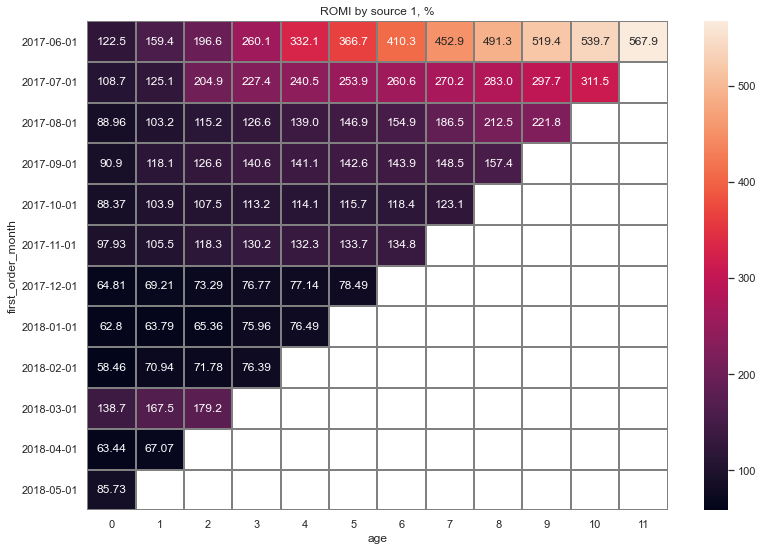

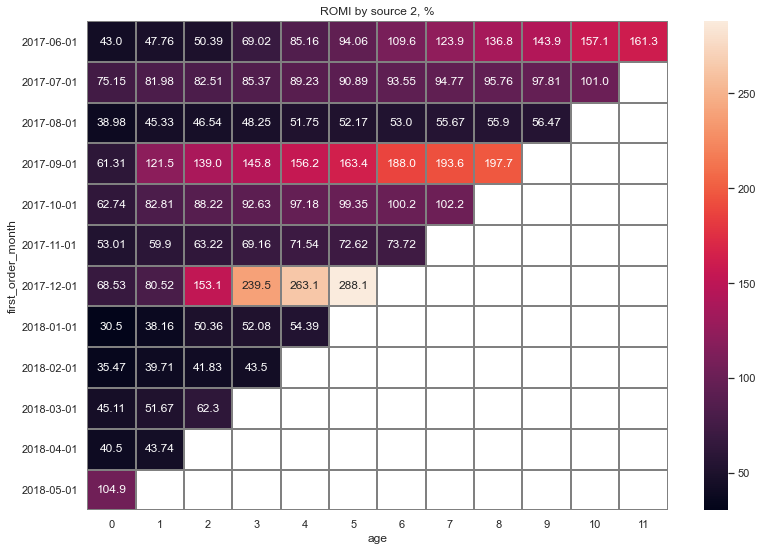

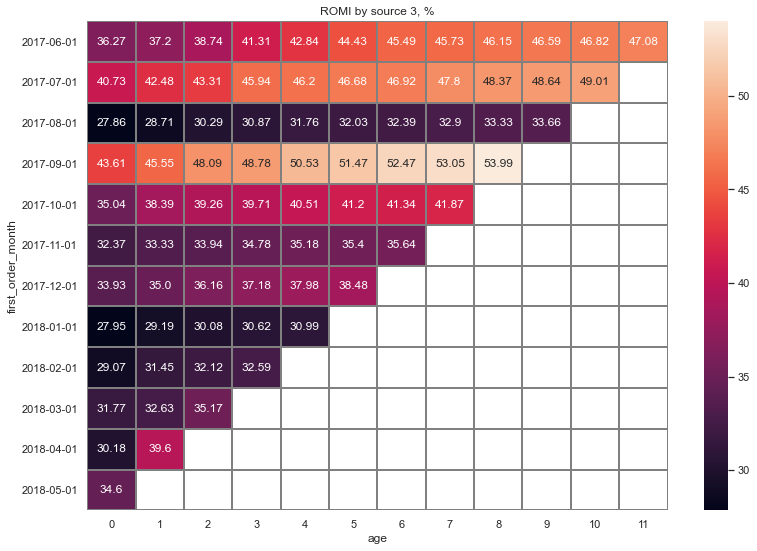

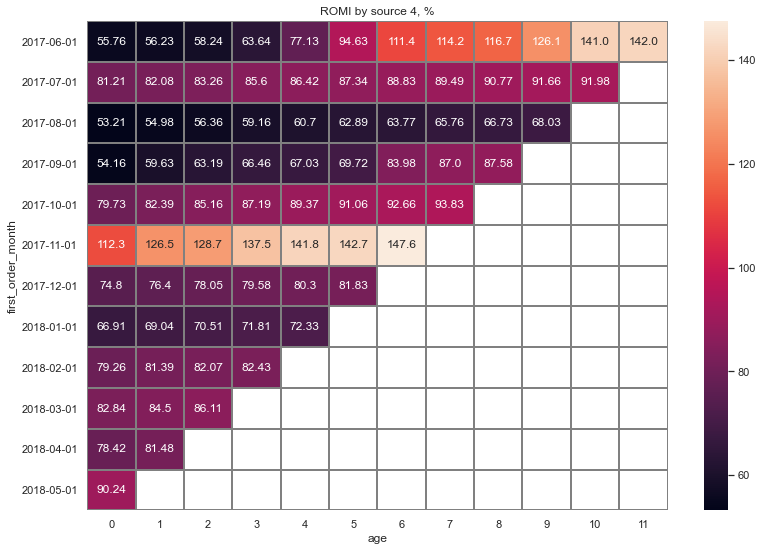

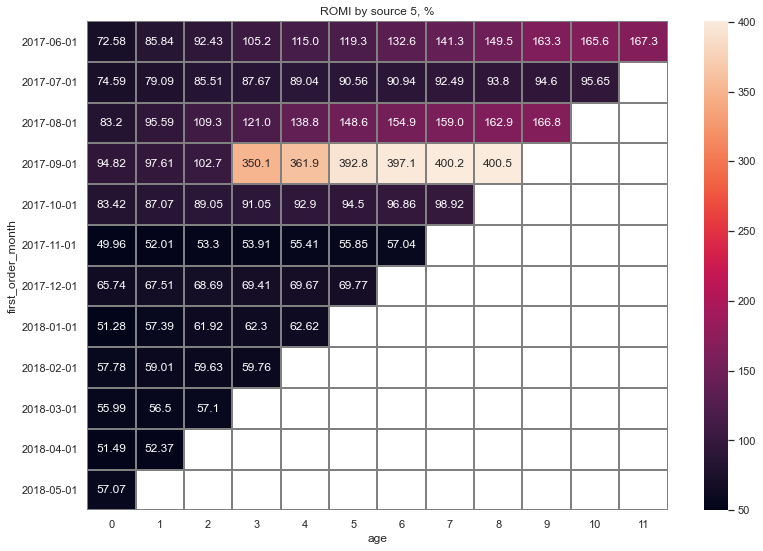

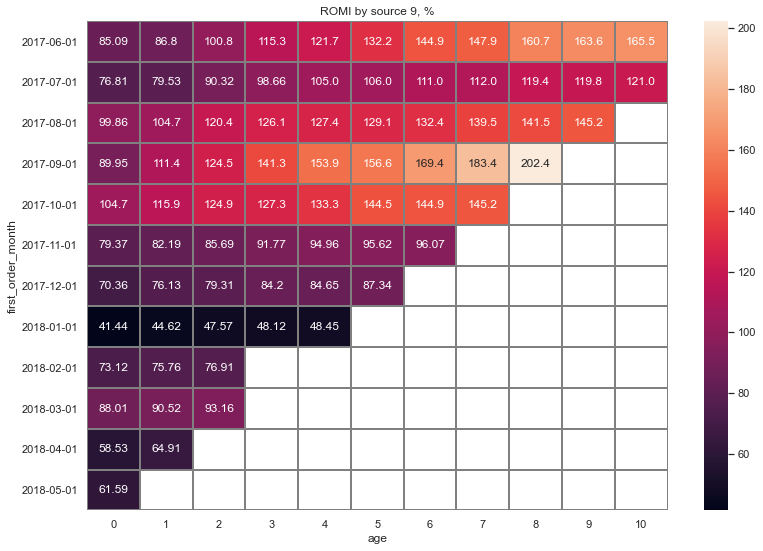

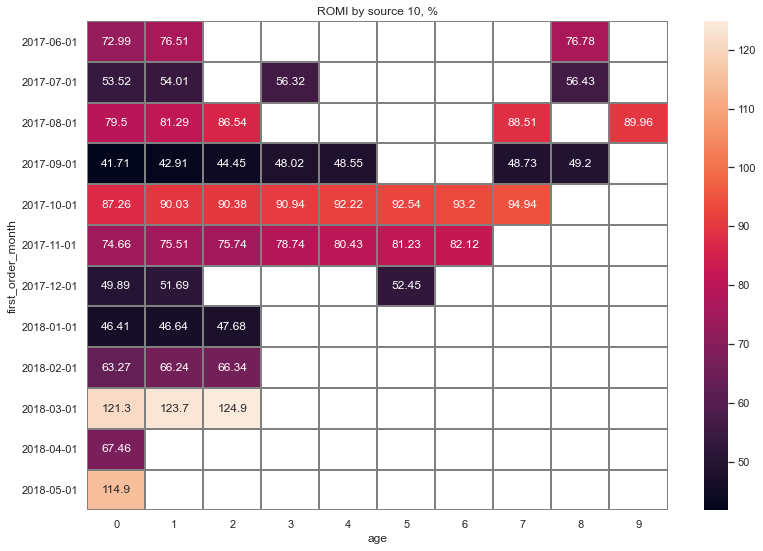

In [120]:
for source_id in report_new['source_id'].unique():
    output=report_new.query('source_id == @source_id').pivot_table(index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('ROMI by source {:}, %'.format(source_id))
    sns.heatmap(output.cumsum(axis=1), annot=True, fmt='0.4', linewidths=1, linecolor='gray', yticklabels=labels);


In [121]:
romi_by_source = report_new.pivot_table(
        index='first_order_month',
        columns='source_id',
        values='romi', 
        aggfunc='sum')
romi_by_source

source_id,1,2,3,4,5,9,10
first_order_month,,,,,,,
2017-06-01,567.904514,161.295718,47.083352,142.047058,167.333303,165.538882,76.780600
2017-07-01,311.546492,101.048386,49.007801,91.979273,95.654973,121.035235,56.430780
2017-08-01,221.778506,56.469451,33.661212,68.028135,166.756205,145.197445,89.955712
2017-09-01,157.425716,197.655125,53.989793,87.583249,400.498813,202.401232,49.195737
2017-10-01,123.073734,102.228896,41.872971,93.834919,98.919791,145.248683,94.936547
2017-11-01,134.787499,73.718291,35.639699,147.563660,57.040254,96.068386,82.120501
2017-12-01,78.494362,288.118951,38.478266,81.826503,69.773624,87.341561,52.446351
2018-01-01,76.494616,54.388923,30.986145,72.333309,62.621009,48.453834,47.681289
2018-02-01,76.385361,43.502952,32.594233,82.432300,59.762468,76.913871,66.340875


***Источник траффика 1 демонстрирует лучшие показатели эффективности. Также эффективны каналы 2 и 9. 3 канал самый неэффективный и самый затратный. Не стоит вкладывать в него деньги. 4 и 10 каналы - дают лучшую эффективность по последним кагортам. Когорты с октября показывают все более низкие ROI.***

### Шаг 3. Общий вывод
<a id='step3'></a>

#### 907 уникальных пользователей заходят на сайт Яндекс Афиши за день
5716 - за месяц и 23 228 - за год. Количество уникальных пользователей увеличилось в октябре 2017,  а в апреле 2018 начало снижаться. Это связано со снижением расходов на маркетинг в этот период. 
Наибольшее количество пользователей пришло на сайт из 1, 3 и 5 источников. 6, 7 и 8 источники - пробные, данные есть не за весь период, количество пользователей по ним минимально. Средняя пользовательская сессия длиться 60 сек.

##### Мобильная версия сайта менее удобна для пользователей, чем основная.
Пользователи в среднем в 2 раза чаше просматривают сайт Яндекс Афиши на ПК, чем на мобильном устройстве. Кроме того, они чаще возвращаются на сайт. Длительность сессий на ПК в 2 раза длиннее, чем на мобильных устройствах.

##### Необходимо обратить внимание на Retention пользователей. Прибегнуть к email-рассылкам тем, кто уже ранее сделал заказ.
Количество посетителей, которые делают повторный заказ относительно первоначального размера когорты менее 5%. Однако эта цифра остается постоянной.
Опасную тенденцию к снижению Retention пользователей в последних кагортах подтверждает и расчет Churn rate. Апрель 2018 - плохой месяц для всех кагорт (снижение Churn rate от 20 до 55 %).

##### Средний чек за исследуемый период составляет 6,9 у.е. 
Средний чек 1, 4 и 7 кагорты выше, чем в остальных.  Средний чек повторных покупок в большинстве дороже, чем в первый месяц.

##### В среднем пользователи покупают через 20 часов после первого визита на сайт
Время между первым визитом на сайт и первой покупкой в кагортах июня-октября 2017 было ниже среднего. В ноябре 2017-феврале 2018 пользователям требовалось больше времени на покупку (в среднем до 40 часов). Как раз в это время увеличился траффик (возможно были технические проблемы). Далее с марта 2018 наметилась тенденция к снижению времени до первой покупки до 20 часов.

##### Необходимо использовать 1, 2 и 9 источники траффика. И не вкладывать средства в 3 источник.

Источник траффика 1 демонстрирует лучшие показатели эффективности. Также эффективны каналы 2 и 9. 3 канал самый неэффективный и самый затратный. 4 и 10 каналы - дают лучшую эффективность по последним кагортам.
Когорты с октября показывают все более низкие ROI. Дополнительное наращивание траффика может привести к убыткам, поэтому решение о снижении расходов на маркетинг - верное. Необходимо пустить этот бюджет на развитие продукта, улучшить мобильную версию.